# Steps of Grover's Search Algorithms
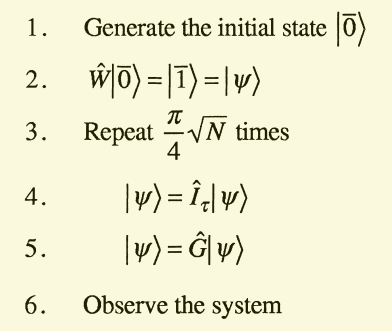

In [1]:
m = 3 # Number of items you want to search

In [2]:
# Here we must eneter the binary items that we want to find as an input
goal_binary = []
for i in range(m):
    b = input(f'Enter a Binary number {i}:')
    goal_binary.extend([b])

Enter a Binary number 0:1010
Enter a Binary number 1:0111
Enter a Binary number 2:0011


In [3]:
goal_dec = []
for i in range(m):    
    b = int(goal_binary[i], 2)
    goal_dec.extend([b])
print('binary form of our goal:   ',goal_binary,';      decimal form of our goal: ',goal_dec)

binary form of our goal:    ['1010', '0111', '0011'] ;      decimal form of our goal:  [10, 7, 3]


In [4]:
n = len(goal_binary[0])               # Number of qubits we need to use
N = 2**n                           # Number of quantum basis for the system
print('Number of qubits in system:  ',n,';  Number of basis states:',N)

Number of qubits in system:   4 ;  Number of basis states: 16


In [5]:
from qiskit import QuantumRegister, QuantumCircuit,ClassicalRegister
from qiskit.quantum_info import Statevector

# 1- Generate the initial state |0...0>

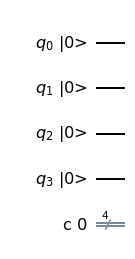

<IPython.core.display.Latex object>

In [6]:
qc = QuantumCircuit(n,n)
display(qc.draw('mpl',initial_state=True),Statevector(qc).draw('latex'))

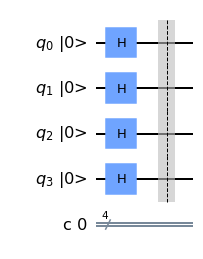

<IPython.core.display.Latex object>

In [7]:
qc.h(range(n))
qc.barrier()
display(qc.draw('mpl',initial_state=True),Statevector(qc).draw('latex'))

# 3- Iteratation by Grover Algorithm

In [8]:
from math import pi,sqrt,floor
Iter = floor((pi/4)*sqrt(N/m)) # Number of iteration that we need 
print('Required number of iterations:   ',Iter)

Required number of iterations:    1


## Required Operateors: R and G

In [9]:
import numpy as np    

In [10]:
def R():
    I = np.identity(N)
    for i in [goal_dec[i] for i in range(m)]:
        I[i,i] = -1
    from qiskit.quantum_info import Operator
    R_op = Operator(I)
    n_qubits = []
    for i in range(n):
        n_qubits.append(i)    
    qc.unitary(R_op, qubits = n_qubits, label ='Uw')
    qc.barrier()
    return qc   

In [11]:
def G():
    I = np.identity(N)
    I[0,0] = -1    
    from qiskit.quantum_info import Operator
    R_0 = Operator(I)
    qc.h(range(n))
    n_qubits = []  
    for i in range(n):
        n_qubits.append(i)    
    qc.unitary(R_0, qubits = n_qubits, label ='Uw')
    qc.h(range(n))
    qc.barrier()
    return qc

# Iteration

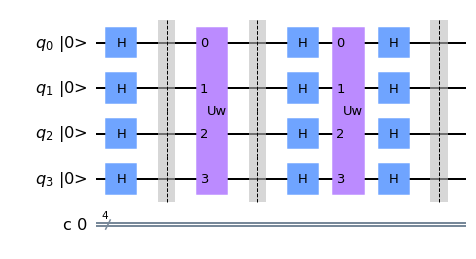

<IPython.core.display.Latex object>

In [12]:
for i in range(Iter):
    R()
    G()
display(qc.draw('mpl',initial_state=True),Statevector(qc).draw('latex'))

## Measurment

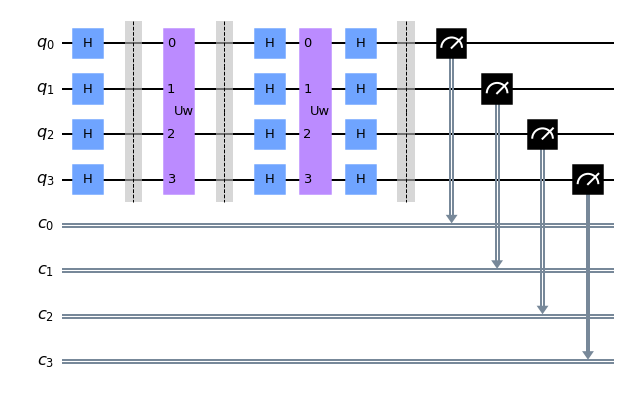

In [15]:
for i in range(n):
    qc.measure(i,i)
qc.draw('mpl',cregbundle=False)

In [16]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_city

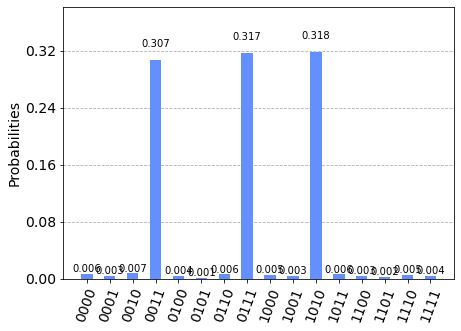

In [17]:
result = QasmSimulator().run(transpile(qc,QasmSimulator()),shots=2048).result()
counts = result.get_counts()
plot_histogram(counts)